In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
import fastf1 
from fastf1 import get_session
import matplotlib.pyplot as plt
import seaborn as sns

#import create_safety_car_features as cscf

from f1_etl import SessionConfig, DataConfig, create_safety_car_dataset

fastf1.Cache.enable_cache('E:\School Stuff\F1cache')

In [10]:
# Define a single race session
session = SessionConfig(
    year=2022,
    race="Sao Paolo Grand Prix",
    session_type="R"  # Race
)

# Configure the dataset
config = DataConfig(
    sessions=[session],
    cache_dir="E:\School Stuff\F1cache"
)

dataset_22 = create_safety_car_dataset(
    config=config,
    window_size=50,
    prediction_horizon=100,
    normalize=True,
    target_column="TrackStatus",
    resampling_strategy="smote",
)


# Generate the dataset
# dataset_22 = create_safety_car_dataset(
#     config=config,
#     window_size=100,
#     prediction_horizon=10,
#     normalization_method='standard',  
#     target_column='TrackStatus',
    #enable_anomaly_filtering=True,
    #speed_threshold=1.0,
    #brake_threshold=50.0,
    #speed_change_threshold=10.0,    
    #brake_change_threshold=5.0,  
    #features_to_check=['Speed', 'Brake']
#)

print(f"Generated {dataset_22['config']['n_sequences']} sequences")
print(f"Features: {dataset_22['config']['feature_names']}")
print(f"Class distribution: {dataset_22['class_distribution']}")

2025-07-08 17:08:29,177 - f1_etl - INFO - Preprocessing configuration:
2025-07-08 17:08:29,177 - f1_etl - INFO -   Missing values: enabled (forward_fill)
2025-07-08 17:08:29,178 - f1_etl - INFO -   Normalization: enabled (standard)
2025-07-08 17:08:29,178 - f1_etl - INFO -   Resampling: smote
2025-07-08 17:08:29,179 - f1_etl - INFO - Driver configuration:
2025-07-08 17:08:29,179 - f1_etl - INFO -   Global drivers: None
2025-07-08 17:08:29,180 - f1_etl - INFO -   Sao Paolo Grand Prix: None


Loading session: 2022 Sao Paolo Grand Prix R
Loading from cache: E:\School Stuff\F1cache\2022_Sao_Paolo_Grand_Prix_R.pkl


2025-07-08 17:08:34,537 - f1_etl - INFO - Creating new fixed vocabulary encoder



📊 Track Status Analysis (training_data):
   green       : 1295180 samples ( 85.6%)
   safety_car  : 180460 samples ( 11.9%)
   vsc         : 23700 samples (  1.6%)
   yellow      : 12920 samples (  0.9%)
   Missing classes: ['red', 'unknown', 'vsc_ending']
✅ FixedVocabTrackStatusEncoder fitted
   Classes seen: ['green', 'safety_car', 'vsc', 'yellow']
   Total classes: 7
   Output mode: integer labels


2025-07-08 17:08:35,445 - f1_etl - INFO - Original class distribution before resampling: {'green': 1295180, 'red': 0, 'safety_car': 180460, 'unknown': 0, 'vsc': 23700, 'vsc_ending': 0, 'yellow': 12920}
2025-07-08 17:08:35,445 - f1_etl - INFO - Applying smote resampling at session/driver level
2025-07-08 17:08:35,446 - f1_etl - INFO - Sampling strategy: minority
2025-07-08 17:08:41,691 - f1_etl - INFO - Resampling complete: 1512260 -> 2794520 samples
2025-07-08 17:08:41,691 - f1_etl - INFO - Class distribution before resampling:
2025-07-08 17:08:41,692 - f1_etl - INFO -   1: 1295180
2025-07-08 17:08:41,692 - f1_etl - INFO -   4: 180460
2025-07-08 17:08:41,693 - f1_etl - INFO -   6: 23700
2025-07-08 17:08:41,693 - f1_etl - INFO -   2: 12920
2025-07-08 17:08:41,693 - f1_etl - INFO - Class distribution after resampling:
2025-07-08 17:08:41,694 - f1_etl - INFO -   1: 1295180
2025-07-08 17:08:41,694 - f1_etl - INFO -   2: 1295180
2025-07-08 17:08:41,695 - f1_etl - INFO -   4: 180460
2025-07-

Generated 111680 sequences
Features: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']
Class distribution: {'green': 52120, 'red': 0, 'safety_car': 7500, 'unknown': 0, 'vsc': 960, 'vsc_ending': 0, 'yellow': 51100}


In [13]:
print(f"X shape: {dataset_22['X'].shape}")
print(dataset_22['X'].shape[2])

X shape: (111680, 50, 9)
9


In [74]:
print(np.unique(dataset_22['y']))
#y_2022 = (dataset_22['y'] == 2).astype(np.float32)
print("\nBinary label distribution:")
print(f"  Class 0 (negative): {np.sum(dataset_22['y'] == 0)} samples")
print(f"  Class 1 (positive): {np.sum(dataset_22['y'] == 1)} samples")

[0 1]

Binary label distribution:
  Class 0 (negative): 26600 samples
  Class 1 (positive): 3171 samples


In [75]:
# Define a single race session
session = SessionConfig(
    year=2023,
    race="Sao Paolo Grand Prix",
    session_type="R"  # Race
)

# Configure the dataset
config = DataConfig(
    sessions=[session],
    cache_dir="E:\School Stuff\F1cache"
)

# Generate the dataset
dataset_23 = cscf.create_safety_car_dataset(
    config=config,
    window_size=100,
    prediction_horizon=10,
    normalization_method='standard',  
    target_column='TrackStatus',
    enable_anomaly_filtering=True,
    speed_threshold=1.0,
    brake_threshold=50.0,
    speed_change_threshold=10.0,    
    brake_change_threshold=5.0,     
    features_to_check=['Speed', 'Brake']
)

print(f"Generated {dataset_23['config']['n_sequences']} sequences")
print(f"Features: {dataset_23['config']['feature_names']}")
print(f"Class distribution: {dataset_23['class_distribution']}")

2025-07-05 18:48:21,383 - f1_etl - INFO - Preprocessing configuration:
2025-07-05 18:48:21,383 - f1_etl - INFO -   Missing values: enabled (forward_fill)
2025-07-05 18:48:21,384 - f1_etl - INFO -   Normalization: enabled (standard)
2025-07-05 18:48:21,384 - f1_etl - INFO -   Anomaly filtering: enabled (zscore)


Loading session: 2023 Sao Paolo Grand Prix R
Loading from cache: E:\School Stuff\F1cache\2023_Sao_Paolo_Grand_Prix_R.pkl


2025-07-05 18:48:26,473 - f1_etl - INFO - Creating new fixed vocabulary encoder
2025-07-05 18:48:26,721 - f1_etl - INFO - Binary conversion: 25280 safety car samples out of 1667860 total
2025-07-05 18:48:26,723 - f1_etl - INFO - Processing 1667860 total telemetry rows
2025-07-05 18:48:26,724 - f1_etl - INFO - Grouping by: ['SessionId', 'Driver']



📊 Track Status Analysis (training_data):
   green       : 1437520 samples ( 86.2%)
   red         : 192880 samples ( 11.6%)
   safety_car  : 25280 samples (  1.5%)
   yellow      : 12180 samples (  0.7%)
   Missing classes: ['unknown', 'vsc', 'vsc_ending']


2025-07-05 18:48:49,558 - f1_etl - INFO - Total sequences generated: 33320
2025-07-05 18:48:49,676 - f1_etl - INFO - Generated 33320 sequences with shape (33320, 100, 9)
2025-07-05 18:48:49,677 - f1_etl - INFO - Applying anomaly filtering to remove normal sequences during safety car periods
2025-07-05 18:48:49,846 - f1_etl - INFO - After anomaly filtering: 33242 sequences remaining
2025-07-05 18:48:49,868 - f1_etl - INFO - No missing values detected, skipping imputation


DEBUG: Before filtering - X shape: (33320, 100, 9), y shape: (33320,)
DEBUG: y unique values: [0 1]
DEBUG: y sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DEBUG: Safety car count in y: 500
DEBUG: Feature names: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']


2025-07-05 18:48:49,869 - f1_etl - INFO - Applying normalization with method: standard
2025-07-05 18:48:50,304 - f1_etl - INFO - Using binary labels directly: [0 1] (counts: [32820   422])
2025-07-05 18:48:50,344 - f1_etl - INFO - Final dataset summary:
2025-07-05 18:48:50,344 - f1_etl - INFO -   Sequences: 33242
2025-07-05 18:48:50,344 - f1_etl - INFO -   Features: 9
2025-07-05 18:48:50,345 - f1_etl - INFO -   Classes: 2 (integer)
2025-07-05 18:48:50,345 - f1_etl - INFO -   Label shape: (33242,)
2025-07-05 18:48:50,346 - f1_etl - INFO -     normal      : 32820 samples ( 98.7%)
2025-07-05 18:48:50,346 - f1_etl - INFO -     safety_car  :   422 samples (  1.3%)


Generated 33242 sequences
Features: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']
Class distribution: {'normal': 32820, 'safety_car': 422}


In [76]:
#y_2023 = (dataset_23['y'] == 2).astype(np.float32)
print("\nBinary label distribution:")
print(f"  Class 0 (negative): {np.sum(dataset_23['y'] == 0)} samples")
print(f"  Class 1 (positive): {np.sum(dataset_23['y'] == 1)} samples")


Binary label distribution:
  Class 0 (negative): 32820 samples
  Class 1 (positive): 422 samples


In [4]:
class GRUClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        #self.sigmoid = nn.Sigmoid()  # For binary classification ##NEED TO REMOVE

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # take last time step
        out = self.fc(out)
        return out

In [10]:
# Create data loaders
train_dataset = TensorDataset(
    torch.tensor(dataset_22['X'], dtype=torch.float32),
    torch.tensor(dataset_22['y'], dtype=torch.float32)
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Calculate class weights
pos_count = np.sum(dataset_22['y'])
neg_count = len(dataset_22['y']) - pos_count
pos_weight = torch.tensor([neg_count / pos_count])

print(f"\nTRAINING DATA STATISTICS:")
print(f"Total training sequences: {len(dataset_22['y']):,}")
print(f"Negative samples: {neg_count:,}")
print(f"Positive samples: {pos_count:,}")
print(f"Class imbalance ratio: {neg_count/pos_count:.1f}:1")
print(f"Positive class weight: {pos_weight.item():.1f}")

# GPU Setup - ADD THIS SECTION
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# Move pos_weight to GPU BEFORE creating criterion
pos_weight = pos_weight.to(device)

# Model setup
model = GRUClassifier(input_dim=len(dataset_22['X'][0, 0, :]), hidden_dim=96, num_layers=2, output_dim=1)
model = model.to(device)  # Move model to GPU

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)  # Now pos_weight is on GPU
optimizer = torch.optim.Adam(
                model.parameters(), 
                lr=0.001,
                weight_decay=1e-05,
            )

print(f"\nMODEL ARCHITECTURE:")
print(f"Input dimension: {len(dataset_22['X'][0, 0, :])}")
print(f"Hidden dimension: 96")
print(f"Number of layers: 2")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")


TRAINING DATA STATISTICS:
Total training sequences: 29,771
Negative samples: 26,600
Positive samples: 3,171
Class imbalance ratio: 8.4:1
Positive class weight: 8.4

Using device: cuda

MODEL ARCHITECTURE:
Input dimension: 9
Hidden dimension: 96
Number of layers: 2
Total parameters: 86,785


In [11]:
# Move model and criterion to GPU
model = model.to(device)
criterion = criterion.to(device)

# Training
print(f"\n{'='*60}")
print("STARTING TRAINING")
print(f"{'='*60}")
num_epochs = 50
best_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    num_batches = 0
    
    for X_batch, y_batch in train_loader:
        # Move data to GPU
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        num_batches += 1
    
    avg_loss = total_loss / num_batches
    
    print(f"Epoch {epoch+1:2d}/{num_epochs}: Loss = {avg_loss:.4f}")
    
    # Save best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), 'best_multi_driver_model.pth')
    
    # Save checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
            'feature_cols': dataset_22['config']['feature_names'],
            'pos_weight': pos_weight.item(),
            #'train_drivers': list(set(train_drivers)),
            #'test_drivers': list(set(test_drivers))
        }, f'multi_driver_checkpoint_epoch_{epoch+1}.pth')
print(f"\nTraining completed! Best loss: {best_loss:.4f}")

In [81]:
# Load best model for evaluation
model.load_state_dict(torch.load('best_multi_driver_model.pth'))

# Get predictions
model.eval()
with torch.no_grad():
    logits = model(torch.tensor(dataset_23['X'], dtype=torch.float32).to(device))
    probs = torch.sigmoid(logits).squeeze().cpu().numpy()

# Find best threshold
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

precision_vals, recall_vals, thresholds = precision_recall_curve(dataset_23['y'], probs)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"\nBest threshold: {best_threshold:.3f}")
print(f"Best F1 score: {f1_scores[best_threshold_idx]:.3f}")

# Overall performance
pred_binary = (probs > best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(f"\n{'='*60}")
print("OVERALL PERFORMANCE (ALL DRIVERS)")
print(f"{'='*60}")
print(classification_report(dataset_23['y'], pred_binary, target_names=['No Safety Car', 'Safety Car']))

print(f"\nConfusion Matrix:")
cm = confusion_matrix(dataset_23['y'], pred_binary)
print(f"                 Predicted")
print(f"                 No SC  Safety Car")
print(f"Actual No SC     {cm[0,0]:5d}  {cm[0,1]:9d}")
print(f"Actual Safety Car {cm[1,0]:4d}  {cm[1,1]:9d}")

C:\Users\jcf03\AppData\Local\Temp\ipykernel_28860\4039184378.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_multi_driver_model.pt


Best threshold: 0.998
Best F1 score: 0.516

OVERALL PERFORMANCE (ALL DRIVERS)
               precision    recall  f1-score   support

No Safety Car       0.99      0.99      0.99     32820
   Safety Car       0.45      0.59      0.51       422

     accuracy                           0.99     33242
    macro avg       0.72      0.79      0.75     33242
 weighted avg       0.99      0.99      0.99     33242


Confusion Matrix:
                 Predicted
                 No SC  Safety Car
Actual No SC     32517        303
Actual Safety Car  171        251


Very high confidence predictions (>0.99): 673
Of these, actual safety cars: 264


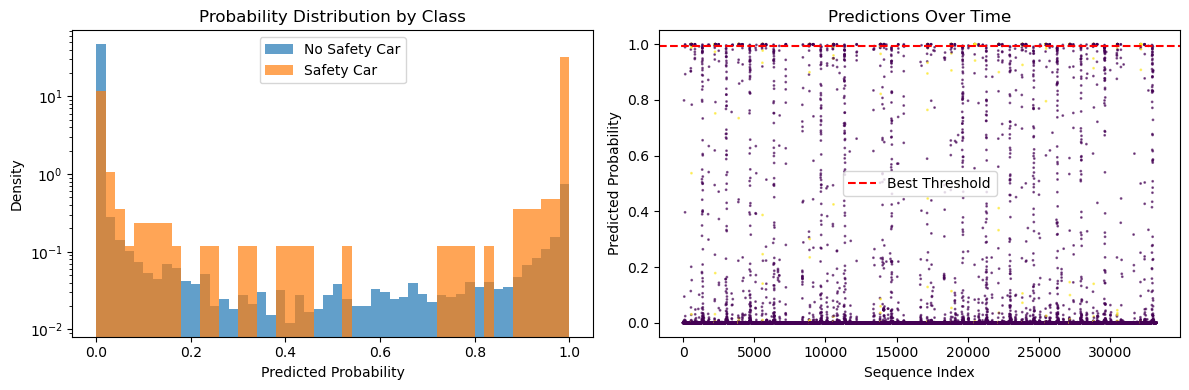

In [82]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(probs[dataset_23['y'] == 0], bins=50, alpha=0.7, label='No Safety Car', density=True)
plt.hist(probs[dataset_23['y'] == 1], bins=50, alpha=0.7, label='Safety Car', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.title('Probability Distribution by Class')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Look at very high confidence predictions
high_conf_mask = probs > 0.99
print(f"Very high confidence predictions (>0.99): {high_conf_mask.sum()}")
print(f"Of these, actual safety cars: {dataset_23['y'][high_conf_mask].sum()}")

plt.scatter(range(len(probs)), probs, c=dataset_23['y'], alpha=0.6, s=1)
plt.xlabel('Sequence Index')
plt.ylabel('Predicted Probability')
plt.title('Predictions Over Time')
plt.axhline(y=0.995, color='red', linestyle='--', label='Best Threshold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Try different thresholds to see precision-recall trade-off
for thresh in [0.99, 0.995, 0.998, 0.999]:
    pred = (probs > thresh).astype(int)
    precision = precision_score(y_2023, pred, zero_division=0)
    recall = recall_score(y_2023, pred, zero_division=0)
    f1 = f1_score(y_2023, pred, zero_division=0)
    
    tp = np.sum((pred == 1) & (y_2023 == 1))
    fp = np.sum((pred == 1) & (y_2023 == 0))
    
    print(f"Threshold {thresh}: P={precision:.3f}, R={recall:.3f}, F1={f1:.3f}, TP={tp}, FP={fp}")

In [77]:
del model

Plot saved to: safety_car_race_timeline.png


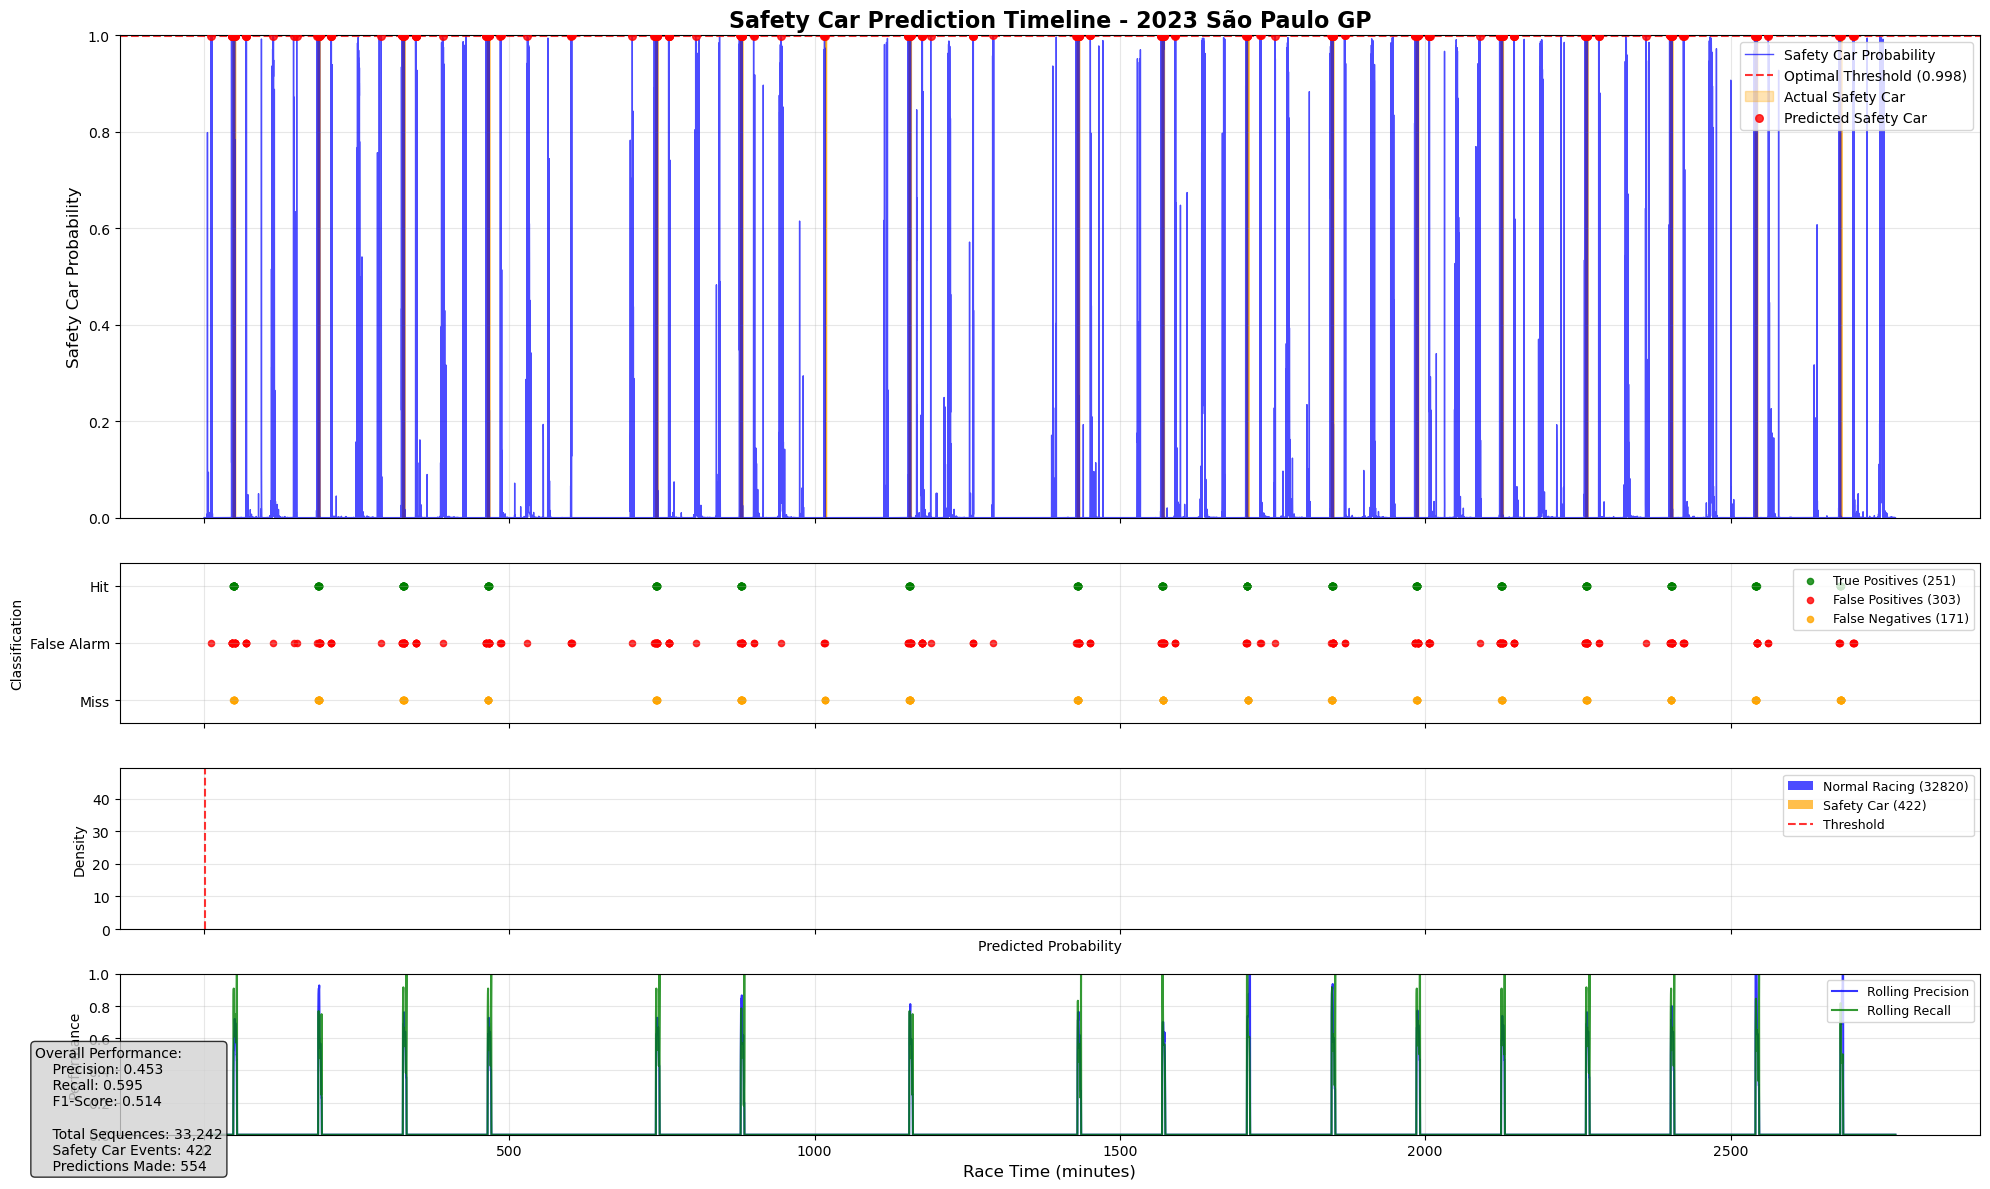

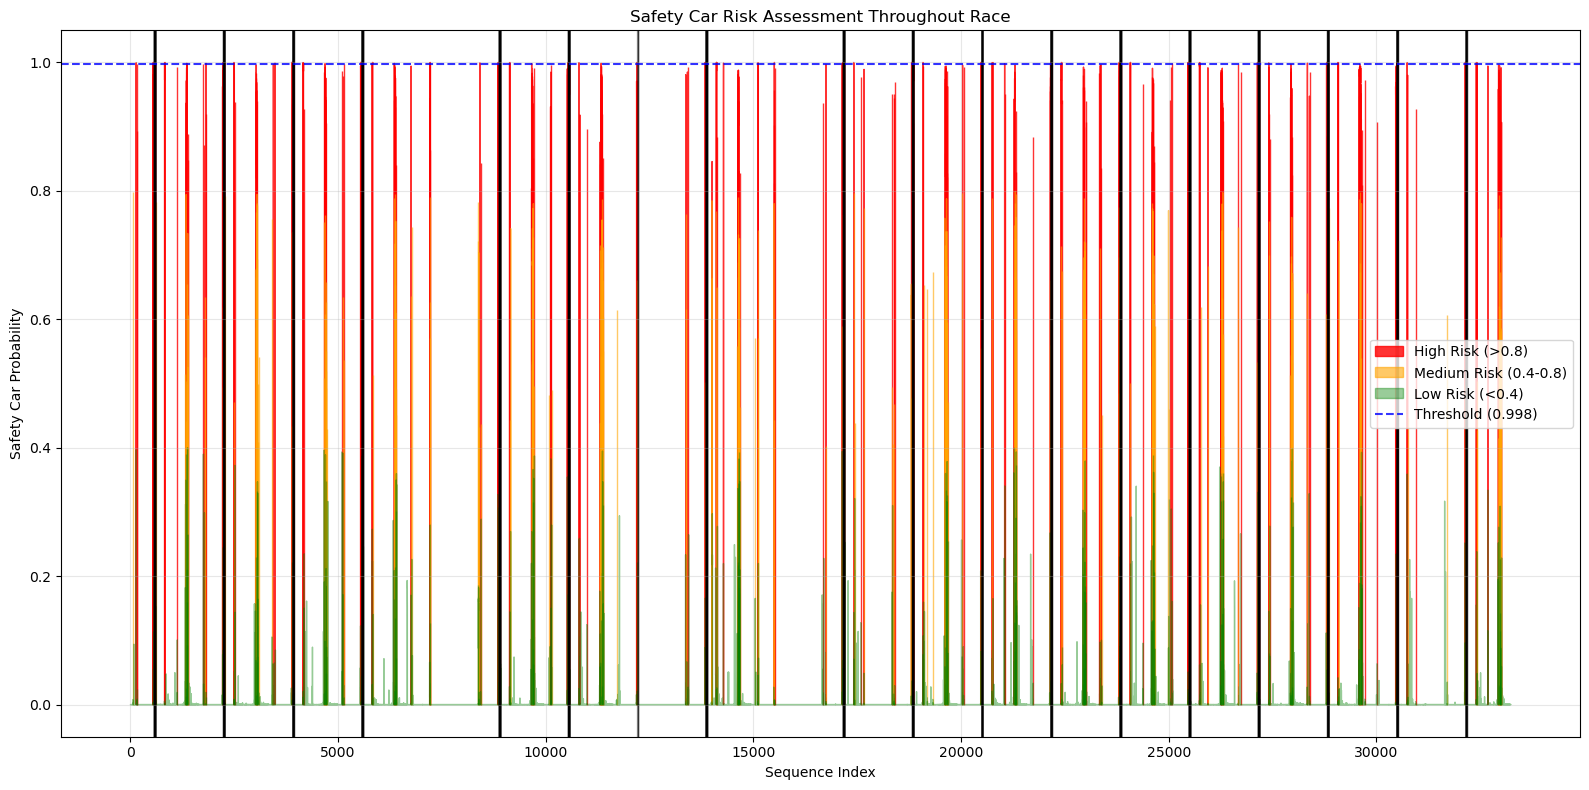


RACE TIMELINE ANALYSIS
Longest continuous high-risk period: 16 sequences
Average high-risk period length: 4.6 sequences
Number of distinct risk periods: 120

Probability Statistics:
  Mean probability: 0.044
  Max probability: 1.000
  Min probability: 0.000
  Std deviation: 0.190

Safety Car Timing:
  First safety car sequence: 572
  Last safety car sequence: 32172
  Total race sequences: 33242
  Safety car coverage: 1.3% of race


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

def plot_race_probabilities(dataset, probs, pred_binary, best_threshold, 
                          window_size=100, prediction_horizon=10, 
                          figsize=(20, 12), save_path=None):
    """
    Plot safety car probabilities across the entire race timeline
    
    Parameters:
    -----------
    dataset : dict - Dataset containing X, y, and metadata
    probs : np.array - Model predicted probabilities
    pred_binary : np.array - Binary predictions
    best_threshold : float - Optimal threshold
    window_size : int - Size of sequence windows
    prediction_horizon : int - Prediction horizon used
    figsize : tuple - Figure size
    save_path : str - Path to save plot (optional)
    """
    
    # Extract data
    y_true = dataset['y']
    
    # Create time indices (approximate race timeline)
    # Each sequence represents a point in time
    time_indices = np.arange(len(probs))
    
    # Convert to approximate race time (assuming sequences are created every 50 timesteps)
    # This is an approximation - adjust based on your actual step_size
    step_size = window_size // 2  # Typical step size
    race_time_minutes = time_indices * step_size / 600  # Assuming 10 Hz data (60 * 10 = 600 per minute)
    
    # Create the plot
    fig, axes = plt.subplots(4, 1, figsize=figsize, sharex=True, height_ratios=[3, 1, 1, 1])
    
    # Main probability plot
    ax1 = axes[0]
    
    # Plot probabilities
    ax1.plot(race_time_minutes, probs, color='blue', alpha=0.7, linewidth=1, label='Safety Car Probability')
    
    # Add threshold line
    ax1.axhline(y=best_threshold, color='red', linestyle='--', alpha=0.8, 
               label=f'Optimal Threshold ({best_threshold:.3f})')
    
    # Shade actual safety car periods
    safety_car_mask = y_true == 1
    for i in range(len(safety_car_mask)):
        if safety_car_mask[i]:
            ax1.axvspan(race_time_minutes[i] - 0.5, race_time_minutes[i] + 0.5, 
                       alpha=0.3, color='orange', label='Actual Safety Car' if i == np.where(safety_car_mask)[0][0] else "")
    
    # Highlight predictions above threshold
    pred_mask = pred_binary == 1
    ax1.scatter(race_time_minutes[pred_mask], probs[pred_mask], 
               color='red', s=30, alpha=0.8, label='Predicted Safety Car', zorder=5)
    
    ax1.set_ylabel('Safety Car Probability', fontsize=12)
    ax1.set_title('Safety Car Prediction Timeline - 2023 São Paulo GP', fontsize=16, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right')
    ax1.set_ylim(0, 1)
    
    # True positives, false positives, false negatives
    ax2 = axes[1]
    
    # Create classification results
    tp_mask = (y_true == 1) & (pred_binary == 1)
    fp_mask = (y_true == 0) & (pred_binary == 1)
    fn_mask = (y_true == 1) & (pred_binary == 0)
    tn_mask = (y_true == 0) & (pred_binary == 0)
    
    # Plot classification results
    ax2.scatter(race_time_minutes[tp_mask], np.ones(np.sum(tp_mask)), 
               color='green', s=20, label=f'True Positives ({np.sum(tp_mask)})', alpha=0.8)
    ax2.scatter(race_time_minutes[fp_mask], np.ones(np.sum(fp_mask)) * 0.5, 
               color='red', s=20, label=f'False Positives ({np.sum(fp_mask)})', alpha=0.8)
    ax2.scatter(race_time_minutes[fn_mask], np.zeros(np.sum(fn_mask)), 
               color='orange', s=20, label=f'False Negatives ({np.sum(fn_mask)})', alpha=0.8)
    
    ax2.set_ylabel('Classification', fontsize=10)
    ax2.set_ylim(-0.2, 1.2)
    ax2.set_yticks([0, 0.5, 1])
    ax2.set_yticklabels(['Miss', 'False Alarm', 'Hit'])
    ax2.legend(loc='upper right', fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    # Probability distribution histogram
    ax3 = axes[2]
    
    # Split probabilities by true class
    probs_safety = probs[y_true == 1]
    probs_normal = probs[y_true == 0]
    
    ax3.hist(probs_normal, bins=50, alpha=0.7, color='blue', label=f'Normal Racing ({len(probs_normal)})', density=True)
    ax3.hist(probs_safety, bins=50, alpha=0.7, color='orange', label=f'Safety Car ({len(probs_safety)})', density=True)
    ax3.axvline(x=best_threshold, color='red', linestyle='--', alpha=0.8, label='Threshold')
    
    ax3.set_ylabel('Density', fontsize=10)
    ax3.set_xlabel('Predicted Probability', fontsize=10)
    ax3.legend(loc='upper right', fontsize=9)
    ax3.grid(True, alpha=0.3)
    
    # Performance metrics over time (rolling window)
    ax4 = axes[3]
    
    # Calculate rolling precision and recall
    window = 50  # Rolling window size
    rolling_precision = []
    rolling_recall = []
    rolling_times = []
    
    for i in range(window, len(probs)):
        start_idx = i - window
        end_idx = i
        
        y_window = y_true[start_idx:end_idx]
        pred_window = pred_binary[start_idx:end_idx]
        
        if np.sum(pred_window) > 0:  # Avoid division by zero
            precision = np.sum((y_window == 1) & (pred_window == 1)) / np.sum(pred_window)
        else:
            precision = 0
            
        if np.sum(y_window) > 0:  # Avoid division by zero
            recall = np.sum((y_window == 1) & (pred_window == 1)) / np.sum(y_window)
        else:
            recall = 0
            
        rolling_precision.append(precision)
        rolling_recall.append(recall)
        rolling_times.append(race_time_minutes[i])
    
    ax4.plot(rolling_times, rolling_precision, color='blue', label='Rolling Precision', alpha=0.8)
    ax4.plot(rolling_times, rolling_recall, color='green', label='Rolling Recall', alpha=0.8)
    
    ax4.set_ylabel('Performance', fontsize=10)
    ax4.set_xlabel('Race Time (minutes)', fontsize=12)
    ax4.set_ylim(0, 1)
    ax4.legend(loc='upper right', fontsize=9)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Add summary statistics as text
    overall_precision = np.sum((y_true == 1) & (pred_binary == 1)) / np.sum(pred_binary) if np.sum(pred_binary) > 0 else 0
    overall_recall = np.sum((y_true == 1) & (pred_binary == 1)) / np.sum(y_true) if np.sum(y_true) > 0 else 0
    overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall) if (overall_precision + overall_recall) > 0 else 0
    
    stats_text = f"""Overall Performance:
    Precision: {overall_precision:.3f}
    Recall: {overall_recall:.3f}
    F1-Score: {overall_f1:.3f}
    
    Total Sequences: {len(probs):,}
    Safety Car Events: {np.sum(y_true):,}
    Predictions Made: {np.sum(pred_binary):,}"""
    
    fig.text(0.02, 0.02, stats_text, fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    plt.show()
    
    return fig


def plot_driver_comparison(dataset, probs, pred_binary, best_threshold, 
                          top_n_drivers=8, figsize=(16, 10)):
    """
    Plot safety car probabilities by individual drivers
    """
    # This would require driver information from your dataset
    # For now, create a simplified version
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create time series plot with probability bands
    time_indices = np.arange(len(probs))
    
    # Create probability bands
    high_prob = probs > 0.8
    medium_prob = (probs > 0.4) & (probs <= 0.8)
    low_prob = probs <= 0.4
    
    ax.fill_between(time_indices, 0, probs, where=high_prob, alpha=0.8, color='red', label='High Risk (>0.8)')
    ax.fill_between(time_indices, 0, probs, where=medium_prob, alpha=0.6, color='orange', label='Medium Risk (0.4-0.8)')
    ax.fill_between(time_indices, 0, probs, where=low_prob, alpha=0.4, color='green', label='Low Risk (<0.4)')
    
    # Add actual safety car periods
    safety_car_mask = dataset['y'] == 1
    for i in range(len(safety_car_mask)):
        if safety_car_mask[i]:
            ax.axvspan(i - 0.5, i + 0.5, alpha=0.3, color='black')
    
    ax.axhline(y=best_threshold, color='blue', linestyle='--', alpha=0.8, 
              label=f'Threshold ({best_threshold:.3f})')
    
    ax.set_xlabel('Sequence Index')
    ax.set_ylabel('Safety Car Probability')
    ax.set_title('Safety Car Risk Assessment Throughout Race')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig


# Usage example:
if __name__ == "__main__":
    # After your existing code, add:
    
    # Create the main race timeline plot
    fig1 = plot_race_probabilities(
        dataset=dataset_23,
        probs=probs,
        pred_binary=pred_binary,
        best_threshold=best_threshold,
        figsize=(20, 12),
        save_path='safety_car_race_timeline.png'  # Optional: save the plot
    )
    
    # Create driver comparison plot
    fig2 = plot_driver_comparison(
        dataset=dataset_23,
        probs=probs,
        pred_binary=pred_binary,
        best_threshold=best_threshold,
        figsize=(16, 8)
    )
    
    # Print some interesting statistics
    print(f"\n{'='*50}")
    print("RACE TIMELINE ANALYSIS")
    print(f"{'='*50}")
    
    # Find longest continuous high-probability period
    high_prob_mask = probs > best_threshold
    continuous_periods = []
    current_period = 0
    
    for i, is_high in enumerate(high_prob_mask):
        if is_high:
            current_period += 1
        else:
            if current_period > 0:
                continuous_periods.append(current_period)
            current_period = 0
    
    if current_period > 0:
        continuous_periods.append(current_period)
    
    if continuous_periods:
        print(f"Longest continuous high-risk period: {max(continuous_periods)} sequences")
        print(f"Average high-risk period length: {np.mean(continuous_periods):.1f} sequences")
        print(f"Number of distinct risk periods: {len(continuous_periods)}")
    
    # Probability statistics
    print(f"\nProbability Statistics:")
    print(f"  Mean probability: {np.mean(probs):.3f}")
    print(f"  Max probability: {np.max(probs):.3f}")
    print(f"  Min probability: {np.min(probs):.3f}")
    print(f"  Std deviation: {np.std(probs):.3f}")
    
    # Time-based statistics
    safety_car_times = np.where(dataset_23['y'] == 1)[0]
    if len(safety_car_times) > 0:
        print(f"\nSafety Car Timing:")
        print(f"  First safety car sequence: {safety_car_times[0]}")
        print(f"  Last safety car sequence: {safety_car_times[-1]}")
        print(f"  Total race sequences: {len(probs)}")
        print(f"  Safety car coverage: {len(safety_car_times)/len(probs)*100:.1f}% of race")

In [84]:
# Define a single race session
session = SessionConfig(
    year=2021,
    race="Sao Paolo Grand Prix",
    session_type="R"  # Race
)

# Configure the dataset
config = DataConfig(
    sessions=[session],
    cache_dir="E:\School Stuff\F1cache"
)

# Generate the dataset
dataset_21 = cscf.create_safety_car_dataset(
    config=config,
    window_size=100,
    prediction_horizon=10,
    normalization_method='standard',  
    target_column='TrackStatus',
    enable_anomaly_filtering=True,
    speed_threshold=1.0,
    brake_threshold=50.0,
    speed_change_threshold=10.0,    
    brake_change_threshold=5.0,     
    features_to_check=['Speed', 'Brake']
)

print(f"Generated {dataset_21['config']['n_sequences']} sequences")
print(f"Features: {dataset_21['config']['feature_names']}")
print(f"Class distribution: {dataset_21['class_distribution']}")

2025-07-05 19:16:10,002 - f1_etl - INFO - Preprocessing configuration:
2025-07-05 19:16:10,003 - f1_etl - INFO -   Missing values: enabled (forward_fill)
2025-07-05 19:16:10,003 - f1_etl - INFO -   Normalization: enabled (standard)
2025-07-05 19:16:10,003 - f1_etl - INFO -   Anomaly filtering: enabled (zscore)


Loading session: 2021 Sao Paolo Grand Prix R


events      WARNING 	Correcting user input 'Sao Paolo Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished lo


📊 Track Status Analysis (training_data):
   green       : 1523820 samples ( 92.7%)
   safety_car  : 73140 samples (  4.4%)
   vsc         : 43000 samples (  2.6%)
   vsc_ending  :  4340 samples (  0.3%)
   Missing classes: ['red', 'unknown', 'yellow']


2025-07-05 19:16:44,716 - f1_etl - INFO - Total sequences generated: 32860
2025-07-05 19:16:44,833 - f1_etl - INFO - Generated 32860 sequences with shape (32860, 100, 9)
2025-07-05 19:16:44,834 - f1_etl - INFO - Applying anomaly filtering to remove normal sequences during safety car periods


DEBUG: Before filtering - X shape: (32860, 100, 9), y shape: (32860,)
DEBUG: y unique values: [0 1]
DEBUG: y sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DEBUG: Safety car count in y: 1460
DEBUG: Feature names: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']


2025-07-05 19:16:45,164 - f1_etl - INFO - After anomaly filtering: 32855 sequences remaining
2025-07-05 19:16:45,185 - f1_etl - INFO - No missing values detected, skipping imputation
2025-07-05 19:16:45,185 - f1_etl - INFO - Applying normalization with method: standard
2025-07-05 19:16:45,634 - f1_etl - INFO - Using binary labels directly: [0 1] (counts: [31400  1455])
2025-07-05 19:16:45,678 - f1_etl - INFO - Final dataset summary:
2025-07-05 19:16:45,679 - f1_etl - INFO -   Sequences: 32855
2025-07-05 19:16:45,680 - f1_etl - INFO -   Features: 9
2025-07-05 19:16:45,680 - f1_etl - INFO -   Classes: 2 (integer)
2025-07-05 19:16:45,680 - f1_etl - INFO -   Label shape: (32855,)
2025-07-05 19:16:45,681 - f1_etl - INFO -     normal      : 31400 samples ( 95.6%)
2025-07-05 19:16:45,681 - f1_etl - INFO -     safety_car  :  1455 samples (  4.4%)


Generated 32855 sequences
Features: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']
Class distribution: {'normal': 31400, 'safety_car': 1455}


In [85]:
# Load best model for evaluation
model.load_state_dict(torch.load('best_multi_driver_model.pth'))

# Get predictions
model.eval()
with torch.no_grad():
    logits = model(torch.tensor(dataset_21['X'], dtype=torch.float32).to(device))
    probs = torch.sigmoid(logits).squeeze().cpu().numpy()

# Find best threshold
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

precision_vals, recall_vals, thresholds = precision_recall_curve(dataset_21['y'], probs)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"\nBest threshold: {best_threshold:.3f}")
print(f"Best F1 score: {f1_scores[best_threshold_idx]:.3f}")

# Overall performance
pred_binary = (probs > best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(f"\n{'='*60}")
print("OVERALL PERFORMANCE (ALL DRIVERS)")
print(f"{'='*60}")
print(classification_report(dataset_21['y'], pred_binary, target_names=['No Safety Car', 'Safety Car']))

print(f"\nConfusion Matrix:")
cm = confusion_matrix(dataset_21['y'], pred_binary)
print(f"                 Predicted")
print(f"                 No SC  Safety Car")
print(f"Actual No SC     {cm[0,0]:5d}  {cm[0,1]:9d}")
print(f"Actual Safety Car {cm[1,0]:4d}  {cm[1,1]:9d}")

C:\Users\jcf03\AppData\Local\Temp\ipykernel_28860\999072992.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_multi_driver_model.pth


Best threshold: 0.997
Best F1 score: 0.599

OVERALL PERFORMANCE (ALL DRIVERS)
               precision    recall  f1-score   support

No Safety Car       0.98      0.98      0.98     31400
   Safety Car       0.56      0.64      0.60      1455

     accuracy                           0.96     32855
    macro avg       0.77      0.81      0.79     32855
 weighted avg       0.96      0.96      0.96     32855


Confusion Matrix:
                 Predicted
                 No SC  Safety Car
Actual No SC     30670        730
Actual Safety Car  522        933


In [14]:
# Define a single race session
session = SessionConfig(
    year=2022,
    race="Sao Paolo Grand Prix",
    session_type="R"  # Race
)

# Configure the dataset
config = DataConfig(
    sessions=[session],
    cache_dir="E:\School Stuff\F1cache"
)

# Generate the dataset
dataset_24_qatar = cscf.create_safety_car_dataset(
    config=config,
    window_size=100,
    prediction_horizon=10,
    normalization_method='standard',  
    target_column='TrackStatus',
    enable_anomaly_filtering=True,
    speed_threshold=1.0,
    brake_threshold=50.0,
    speed_change_threshold=10.0,    
    brake_change_threshold=5.0,     
    features_to_check=['Speed', 'Brake']
)

print(f"Generated {dataset_24_qatar['config']['n_sequences']} sequences")
print(f"Features: {dataset_24_qatar['config']['feature_names']}")
print(f"Class distribution: {dataset_24_qatar['class_distribution']}")

2025-07-06 18:00:05,000 - f1_etl - INFO - Preprocessing configuration:
2025-07-06 18:00:05,001 - f1_etl - INFO -   Missing values: enabled (forward_fill)
2025-07-06 18:00:05,002 - f1_etl - INFO -   Normalization: enabled (standard)
2025-07-06 18:00:05,002 - f1_etl - INFO -   Anomaly filtering: enabled (zscore)


Loading session: 2022 Sao Paolo Grand Prix R
Loading from cache: E:\School Stuff\F1cache\2022_Sao_Paolo_Grand_Prix_R.pkl


2025-07-06 18:00:09,587 - f1_etl - INFO - Creating new fixed vocabulary encoder
2025-07-06 18:00:09,805 - f1_etl - INFO - Binary conversion: 180460 safety car samples out of 1512260 total
2025-07-06 18:00:09,807 - f1_etl - INFO - Processing 1512260 total telemetry rows
2025-07-06 18:00:09,807 - f1_etl - INFO - Grouping by: ['SessionId', 'Driver']



📊 Track Status Analysis (training_data):
   green       : 1295180 samples ( 85.6%)
   safety_car  : 180460 samples ( 11.9%)
   vsc         : 23700 samples (  1.6%)
   yellow      : 12920 samples (  0.9%)
   Missing classes: ['red', 'unknown', 'vsc_ending']


2025-07-06 18:00:29,751 - f1_etl - INFO - Total sequences generated: 30220
2025-07-06 18:00:29,850 - f1_etl - INFO - Generated 30220 sequences with shape (30220, 100, 9)
2025-07-06 18:00:29,850 - f1_etl - INFO - Applying anomaly filtering to remove normal sequences during safety car periods


DEBUG: Before filtering - X shape: (30220, 100, 9), y shape: (30220,)
DEBUG: y unique values: [0 1]
DEBUG: y sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DEBUG: Safety car count in y: 3620
DEBUG: Feature names: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']


2025-07-06 18:00:30,552 - f1_etl - INFO - After anomaly filtering: 29771 sequences remaining
2025-07-06 18:00:30,572 - f1_etl - INFO - Applying missing value imputation with strategy: forward_fill
2025-07-06 18:00:30,591 - f1_etl - INFO - Handling missing values with strategy: forward_fill
2025-07-06 18:00:31,128 - f1_etl - INFO - Applying normalization with method: standard
2025-07-06 18:00:31,556 - f1_etl - INFO - Using binary labels directly: [0 1] (counts: [26600  3171])
2025-07-06 18:00:31,595 - f1_etl - INFO - Final dataset summary:
2025-07-06 18:00:31,596 - f1_etl - INFO -   Sequences: 29771
2025-07-06 18:00:31,596 - f1_etl - INFO -   Features: 9
2025-07-06 18:00:31,597 - f1_etl - INFO -   Classes: 2 (integer)
2025-07-06 18:00:31,597 - f1_etl - INFO -   Label shape: (29771,)
2025-07-06 18:00:31,598 - f1_etl - INFO -     normal      : 26600 samples ( 89.3%)
2025-07-06 18:00:31,598 - f1_etl - INFO -     safety_car  :  3171 samples ( 10.7%)


Generated 29771 sequences
Features: ['Speed', 'RPM', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Distance', 'DifferentialDistance']
Class distribution: {'normal': 26600, 'safety_car': 3171}


In [15]:
# Load best model for evaluation
model.load_state_dict(torch.load('best_anomaly_model.pth'))

# Get predictions
model.eval()
with torch.no_grad():
    logits = model(torch.tensor(dataset_24_qatar['X'], dtype=torch.float32).to(device))
    probs = torch.sigmoid(logits).squeeze().cpu().numpy()

# Find best threshold
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

precision_vals, recall_vals, thresholds = precision_recall_curve(dataset_24_qatar['y'], probs)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"\nBest threshold: {best_threshold:.3f}")
print(f"Best F1 score: {f1_scores[best_threshold_idx]:.3f}")

# Overall performance
pred_binary = (probs > best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(f"\n{'='*60}")
print("OVERALL PERFORMANCE (ALL DRIVERS)")
print(f"{'='*60}")
print(classification_report(dataset_24_qatar['y'], pred_binary, target_names=['No Safety Car', 'Safety Car']))

print(f"\nConfusion Matrix:")
cm = confusion_matrix(dataset_24_qatar['y'], pred_binary)
print(f"                 Predicted")
print(f"                 No SC  Safety Car")
print(f"Actual No SC     {cm[0,0]:5d}  {cm[0,1]:9d}")
print(f"Actual Safety Car {cm[1,0]:4d}  {cm[1,1]:9d}")

C:\Users\jcf03\AppData\Local\Temp\ipykernel_28408\269165592.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_anomaly_model.pth'))



Best threshold: 0.857
Best F1 score: 0.983

OVERALL PERFORMANCE (ALL DRIVERS)
               precision    recall  f1-score   support

No Safety Car       1.00      1.00      1.00     26600
   Safety Car       0.98      0.99      0.98      3171

     accuracy                           1.00     29771
    macro avg       0.99      0.99      0.99     29771
 weighted avg       1.00      1.00      1.00     29771


Confusion Matrix:
                 Predicted
                 No SC  Safety Car
Actual No SC     26532         68
Actual Safety Car   42       3129


In [16]:
print(probs)

[2.75219736e-06 2.75219736e-06 2.75219736e-06 ... 1.12471505e-04
 1.12471505e-04 1.12471505e-04]


In [18]:
print(type(probs))

<class 'numpy.ndarray'>


In [19]:
np.save('2022probs.npy', probs)